In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from tabulate import tabulate

In [10]:
d1 = 0
d2 = 2
d3 = 0
d4 = 2
d5 = 2
d6 = 1
d7 = 0
d8 = 0
d9 = 7
d10 = 1

a = 4.0 + (abs(d9 - d10)*1e-2)
b = d1 + d2 + d3 + d4
m = 0.20 + ((d5 + d6 + d7 + d8)*1e-3)
n = 3.0 + ((d9 + d10)*1e-2)

print("a = %.4f, b = %.4f, m = %.4f, n = %.4f"%(a, b, m, n))

a = 4.0600, b = 4.0000, m = 0.2030, n = 3.0800


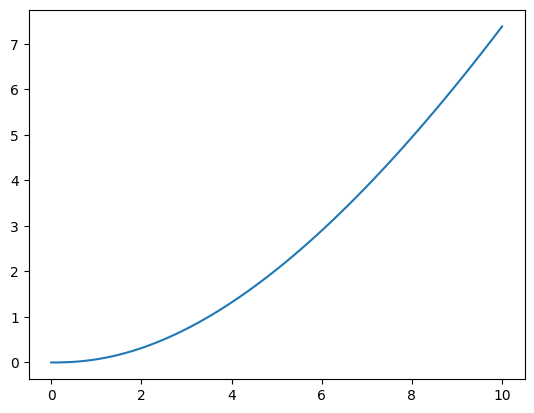

In [13]:
f = lambda x: b*(x**n)*exp(-a*(x**m))

fvectorized = np.vectorize(f)
x = np.linspace(0, 10, 100)
y = fvectorized(x)
plt.plot(x, y)
plt.show()